In [54]:
import os
import pandas as pd
from pathlib import Path
from datasets import load_dataset, DownloadMode
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [55]:
destination_path = '\Data'

dataset_emotion = load_dataset(
    "dair-ai/emotion", "unsplit", 
    cache_dir=destination_path,
    download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS
)

print(dataset_emotion)

# Get class names from dataset features
class_names = dataset_emotion['train'].features['label'].names

# Add new column mapping numeric labels to class names using Dataset.map
dataset_emotion['train'] = dataset_emotion['train'].map(
    lambda example: {'label_name': class_names[example['label']]}
)

# Konverter det fulde datasæt til en pandas DataFrame
df_samlet = dataset_emotion['train'].to_pandas()

df_samlet['text_length'] = df_samlet['text'].apply(len)


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\klykk\AppData\Local\Temp\ipykernel_31696\831718421.py:1: SyntaxWarning: invalid escape sequence '\D'
  destination_path = '\Data'


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 416809
    })
})


Is the train, test og validation split appropriate?

In [56]:
destination_path = '\Data'

dataset_emotion_split = load_dataset(
    "dair-ai/emotion", "split", 
    cache_dir=destination_path,
    download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS
)

print(dataset_emotion_split)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\klykk\AppData\Local\Temp\ipykernel_31696\2259323051.py:1: SyntaxWarning: invalid escape sequence '\D'
  destination_path = '\Data'


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [57]:
# Get class names from dataset features
class_names_train = dataset_emotion_split['train'].features['label'].names
class_names_val = dataset_emotion_split['validation'].features['label'].names
class_names_test = dataset_emotion_split['test'].features['label'].names

# Add new column mapping numeric labels to class names using Dataset.map
dataset_emotion_split['train'] = dataset_emotion_split['train'].map(
    lambda example: {'label_name': class_names_train[example['label']]}
)

dataset_emotion_split['validation'] = dataset_emotion_split['validation'].map(
    lambda example: {'label_name': class_names_val[example['label']]}
)

dataset_emotion_split['test'] = dataset_emotion_split['test'].map(
    lambda example: {'label_name': class_names_test[example['label']]}
)

# Konverter det fulde datasæt til en pandas DataFrame
df_train = dataset_emotion_split['train'].to_pandas()
df_val = dataset_emotion_split['validation'].to_pandas()
df_test = dataset_emotion_split['test'].to_pandas()

# Kontroller for manglende værdier
mis_val_train = df_train.isnull().sum()
mis_val_val = df_val.isnull().sum()
mis_val_test = df_test.isnull().sum()

print('Number of missing values:')
print(mis_val_train,mis_val_val, mis_val_test)

Number of missing values:
text          0
label         0
label_name    0
dtype: int64 text          0
label         0
label_name    0
dtype: int64 text          0
label         0
label_name    0
dtype: int64


Minimum text length (train, val, test):(7,11,14)
Maximum text length(train, val, test):(300,295,296)
Average text length(train, val, test):(96.8458125,95.3475,96.5865)


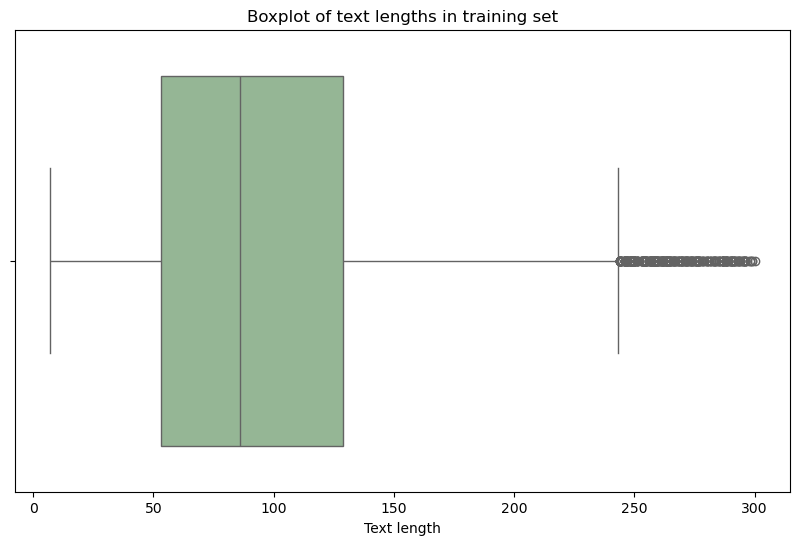

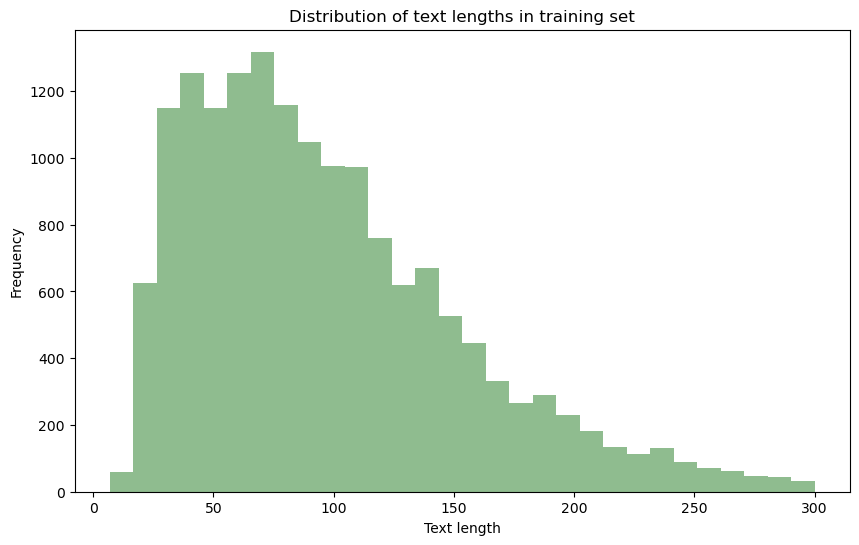

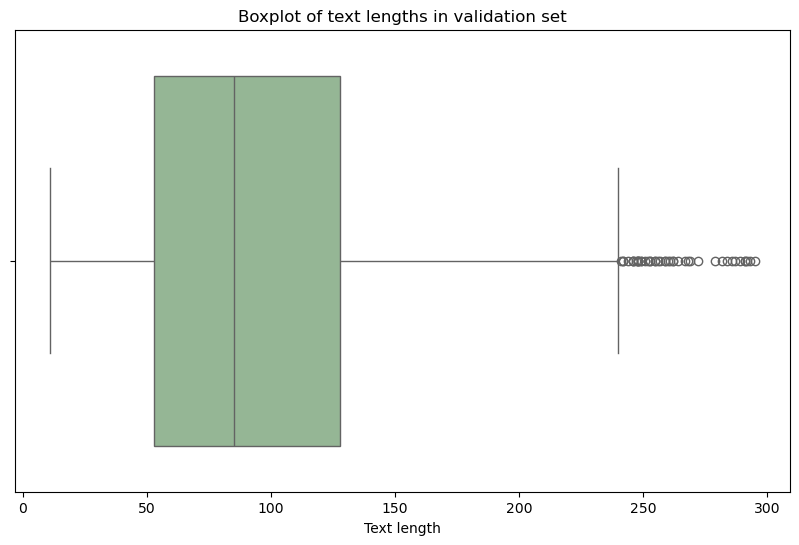

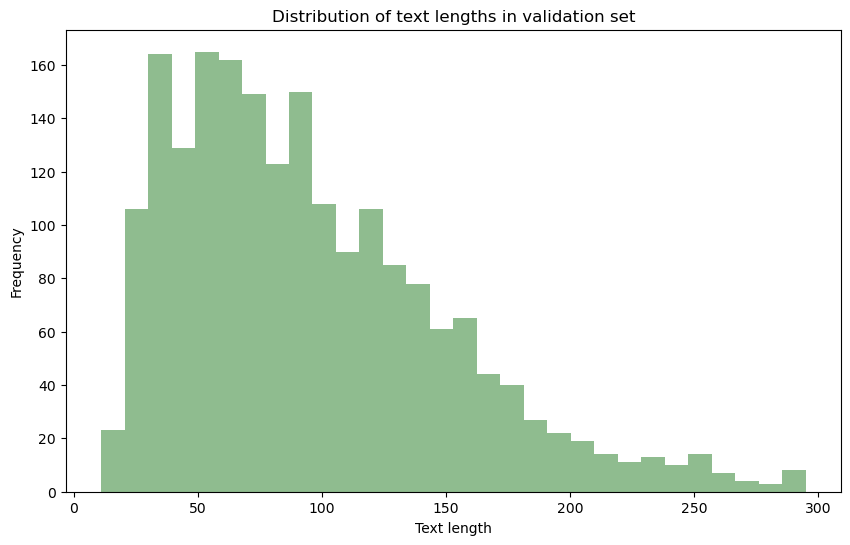

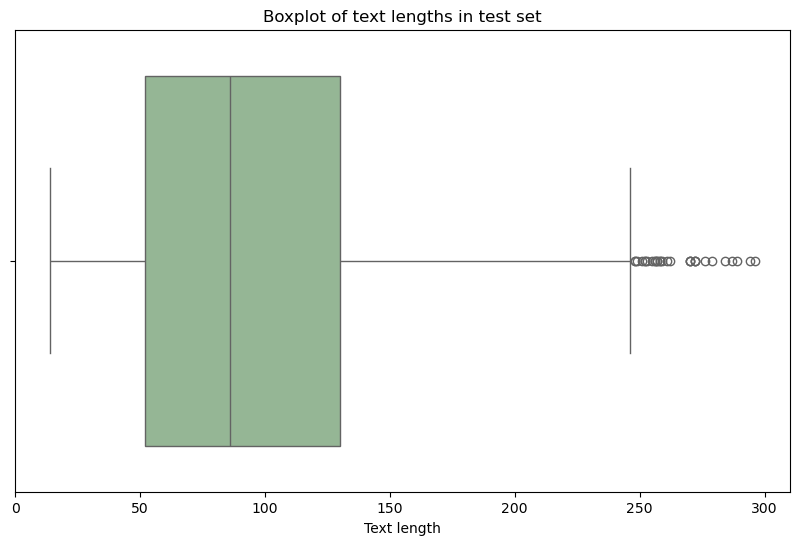

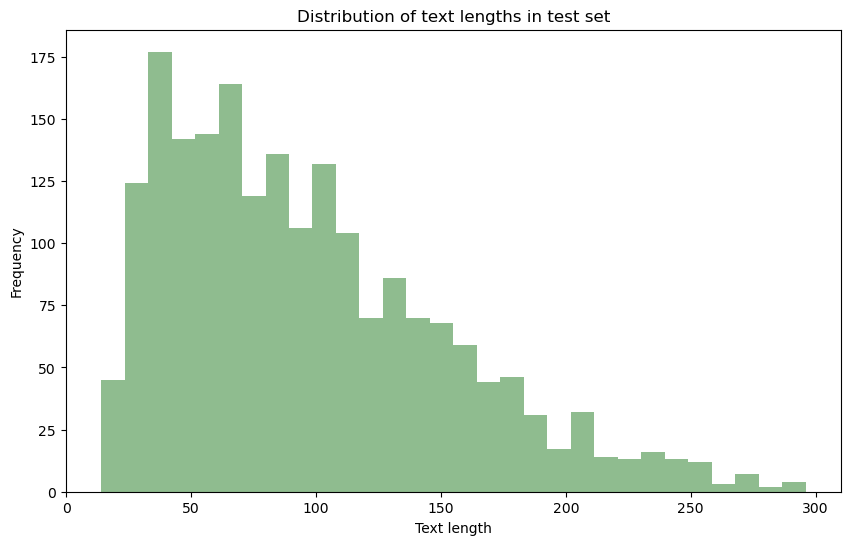

In [58]:
df_train['text_length'] = df_train['text'].apply(len)
df_val['text_length'] = df_val['text'].apply(len)
df_test['text_length'] = df_test['text'].apply(len)

print(f'Minimum text length (train, val, test):({df_train['text_length'].min()},{df_val['text_length'].min()},{df_test['text_length'].min()})')
print(f'Maximum text length(train, val, test):({df_train['text_length'].max()},{df_val['text_length'].max()},{df_test['text_length'].max()})')
print(f'Average text length(train, val, test):({df_train['text_length'].mean()},{df_val['text_length'].mean()},{df_test['text_length'].mean()})')

# train
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['text_length'], color='darkseagreen')
plt.title('Boxplot of text lengths in training set')
plt.xlabel('Text length')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_train['text_length'], bins=30, color='darkseagreen')
plt.title('Distribution of text lengths in training set')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()


# validation
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_val['text_length'], color='darkseagreen')
plt.title('Boxplot of text lengths in validation set')
plt.xlabel('Text length')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(df_val['text_length'], bins=30, color='darkseagreen')
plt.title('Distribution of text lengths in validation set')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

# test
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test['text_length'], color='darkseagreen')
plt.title('Boxplot of text lengths in test set')
plt.xlabel('Text length')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(df_test['text_length'], bins=30, color='darkseagreen')
plt.title('Distribution of text lengths in test set')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

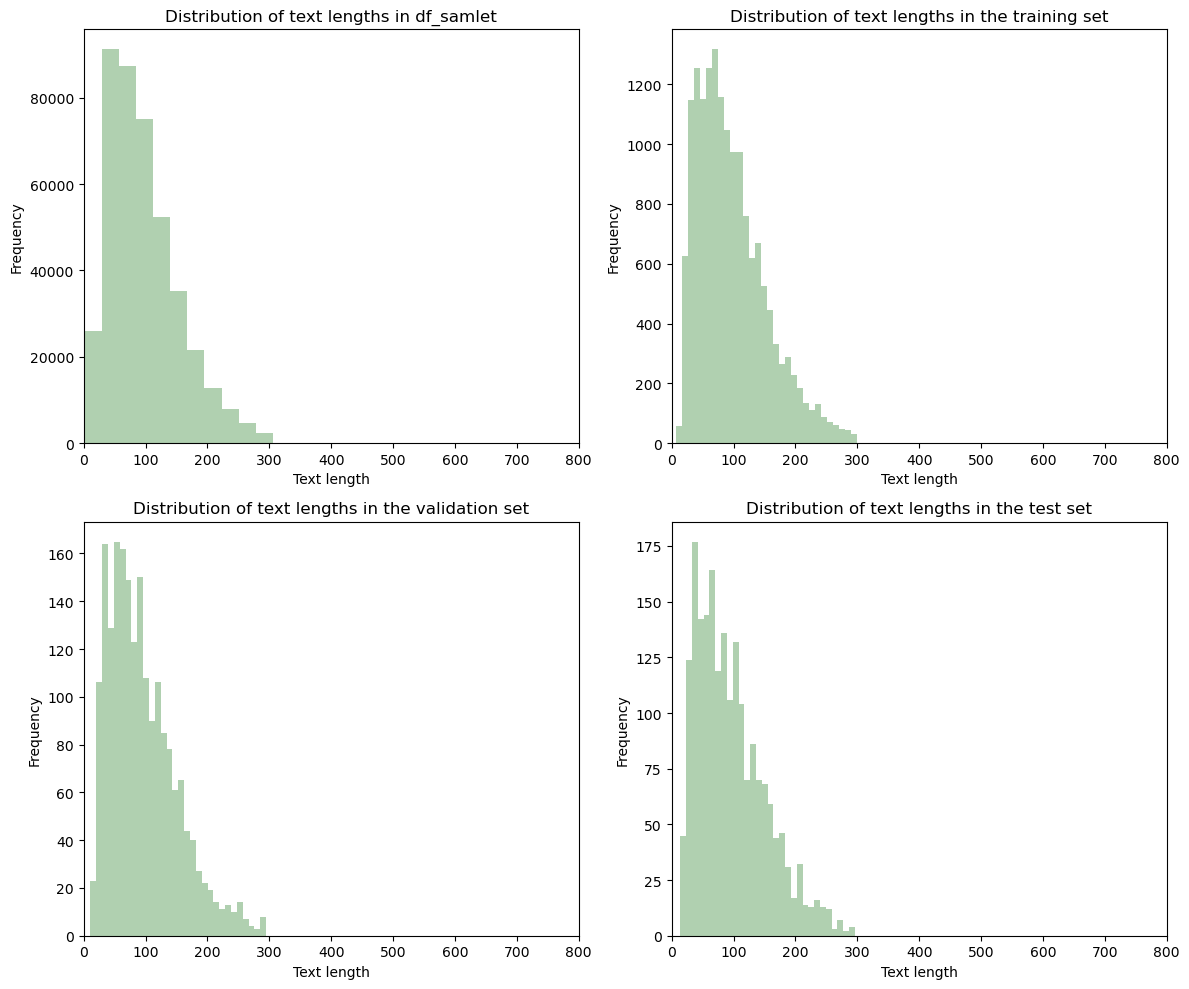

In [59]:
# Data
data1 = df_samlet['text_length']
data2 = df_train['text_length']
data3 = df_val['text_length']
data4 = df_test['text_length']


# Opret subplots (2 rækker og 2 kolonner)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram 1
axes[0, 0].hist(data1, bins=30, color='darkseagreen', alpha=0.7)
axes[0, 0].set_title('Distribution of text lengths in df_samlet')
axes[0, 0].set_xlabel('Text length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlim(0, 800)

# Histogram 2
axes[0, 1].hist(data2, bins=30, color='darkseagreen', alpha=0.7)
axes[0, 1].set_title('Distribution of text lengths in the training set')
axes[0, 1].set_xlabel('Text length')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlim(0, 800)

# Histogram 3
axes[1, 0].hist(data3, bins=30, color='darkseagreen', alpha=0.7)
axes[1, 0].set_title('Distribution of text lengths in the validation set')
axes[1, 0].set_xlabel('Text length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xlim(0, 800)

# Histogram 4
axes[1, 1].hist(data4, bins=30, color='darkseagreen', alpha=0.7)
axes[1, 1].set_title('Distribution of text lengths in the test set')
axes[1, 1].set_xlabel('Text length')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim(0, 800)

# Juster layout for at få plads til titler og labels
plt.tight_layout()

# Vis plottet
plt.show()


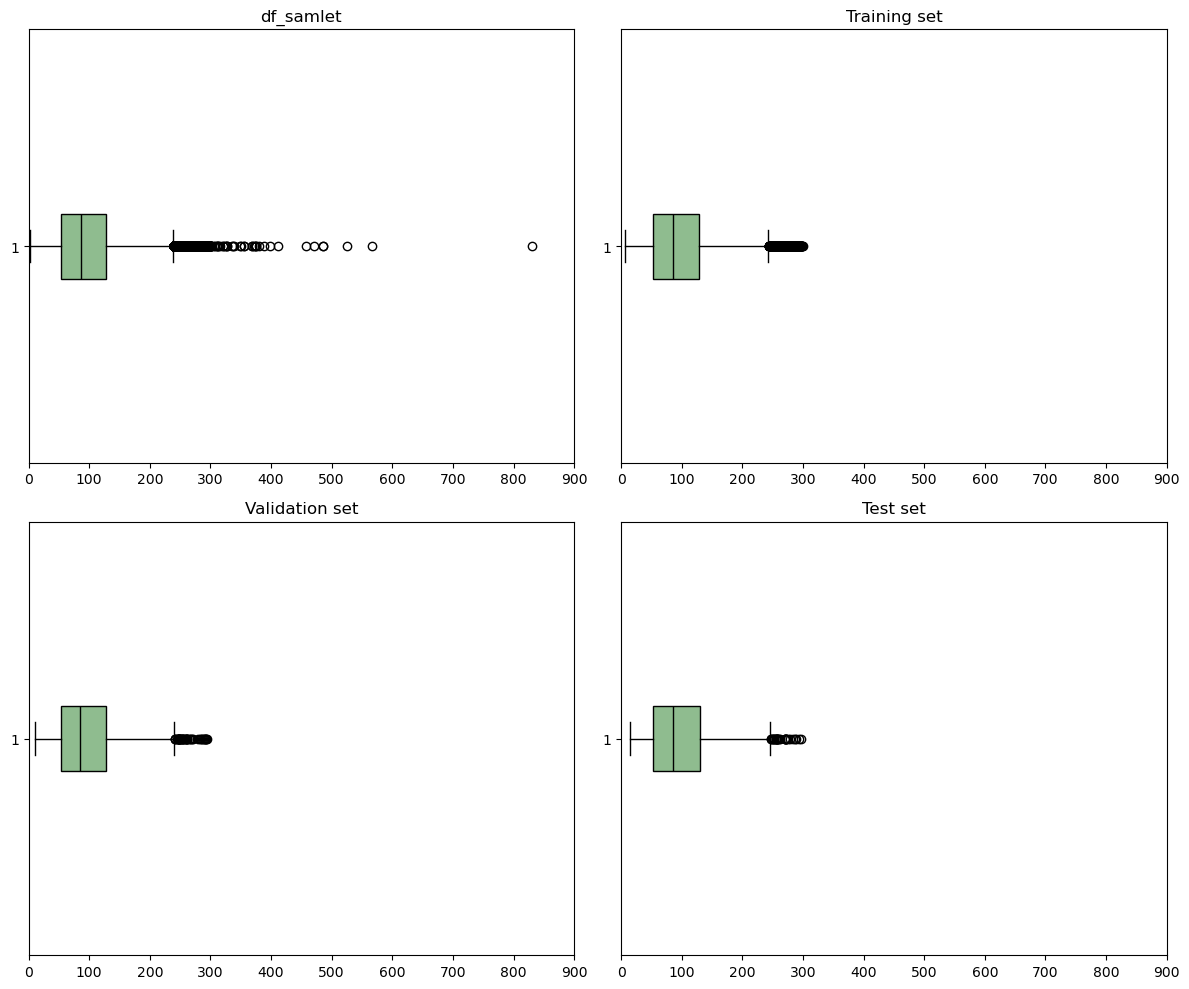

In [60]:
# Data
data1 = df_samlet['text_length']
data2 = df_train['text_length']
data3 = df_val['text_length']
data4 = df_test['text_length']

# Opret subplots (2 rækker og 2 kolonner)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boksplot 1
axes[0, 0].boxplot(data1, patch_artist=True, vert=False,
                   boxprops=dict(facecolor='darkseagreen', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='black'))
axes[0, 0].set_title('df_samlet')
axes[0, 0].set_xlim(0, 900)


# Boksplot 2
axes[0, 1].boxplot(data2, patch_artist=True, vert=False,
                   boxprops=dict(facecolor='darkseagreen', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='black'))
axes[0, 1].set_title('Training set')
axes[0, 1].set_xlim(0, 900)

# Boksplot 3
axes[1, 0].boxplot(data3, patch_artist=True, vert=False,
                   boxprops=dict(facecolor='darkseagreen', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='black'))
axes[1, 0].set_title('Validation set')
axes[1, 0].set_xlim(0, 900)

# Boksplot 4
axes[1, 1].boxplot(data4, patch_artist=True, vert=False,
                   boxprops=dict(facecolor='darkseagreen', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='black'))
axes[1, 1].set_title('Test set')
axes[1, 1].set_xlim(0, 900)


# Juster layout for at få plads til titler og labels
plt.tight_layout()

# Vis plottet
plt.show()


In [61]:
# largest outlier

outlier1 = df_samlet['text_length'].max()
outlier2 = df_train['text_length'].max()
outlier3 = df_val['text_length'].max()
outlier4 = df_test['text_length'].max()

print(outlier1, outlier2, outlier3, outlier4)

830 300 295 296


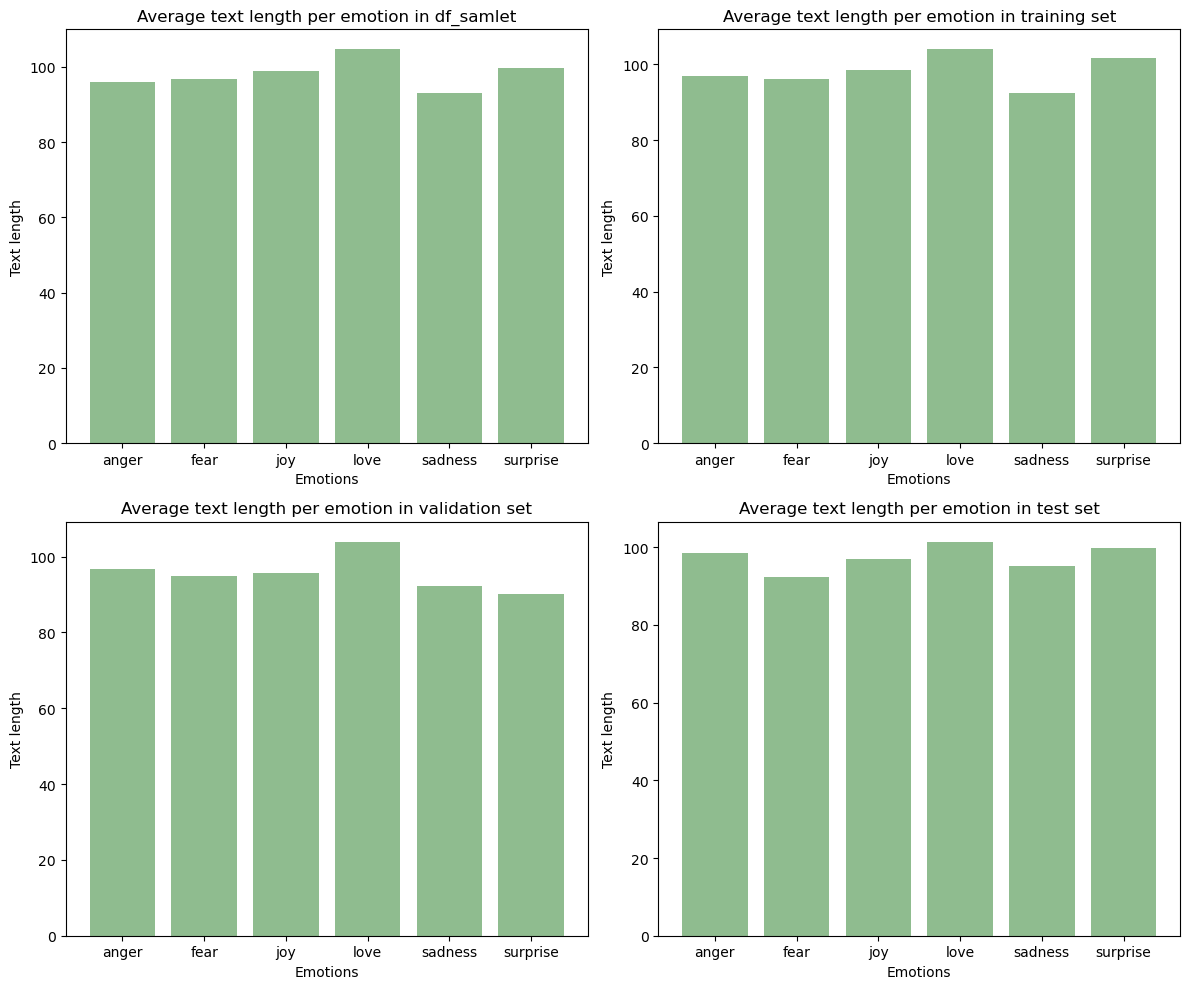

In [62]:
groups_mean_length = df_samlet.groupby('label_name')['text_length'].mean()
groups_mean_train = df_train.groupby('label_name')['text_length'].mean()
groups_mean_val = df_val.groupby('label_name')['text_length'].mean()
groups_mean_test = df_test.groupby('label_name')['text_length'].mean()

# Opret subplots (2 rækker og 2 kolonner)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart 1
axes[0, 0].bar(groups_mean_length.index, groups_mean_length.values, color='darkseagreen')
axes[0, 0].set_title('Average text length per emotion in df_samlet')
axes[0, 0].set_xlabel('Emotions')
axes[0, 0].set_ylabel('Text length')

# Bar chart 2
axes[0, 1].bar(groups_mean_train.index, groups_mean_train.values, color='darkseagreen')
axes[0, 1].set_title('Average text length per emotion in training set')
axes[0, 1].set_xlabel('Emotions')
axes[0, 1].set_ylabel('Text length')

# Bar chart 3
axes[1, 0].bar(groups_mean_val.index, groups_mean_val.values, color='darkseagreen')
axes[1, 0].set_title('Average text length per emotion in validation set')
axes[1, 0].set_xlabel('Emotions')
axes[1, 0].set_ylabel('Text length')

# Bar chart 4
axes[1, 1].bar(groups_mean_test.index, groups_mean_test.values, color='darkseagreen')
axes[1, 1].set_title('Average text length per emotion in test set')
axes[1, 1].set_xlabel('Emotions')
axes[1, 1].set_ylabel('Text length')

# Juster layout for at få plads til titler og labels
plt.tight_layout()

# Vis plottet
plt.show()


Distribution of emotions

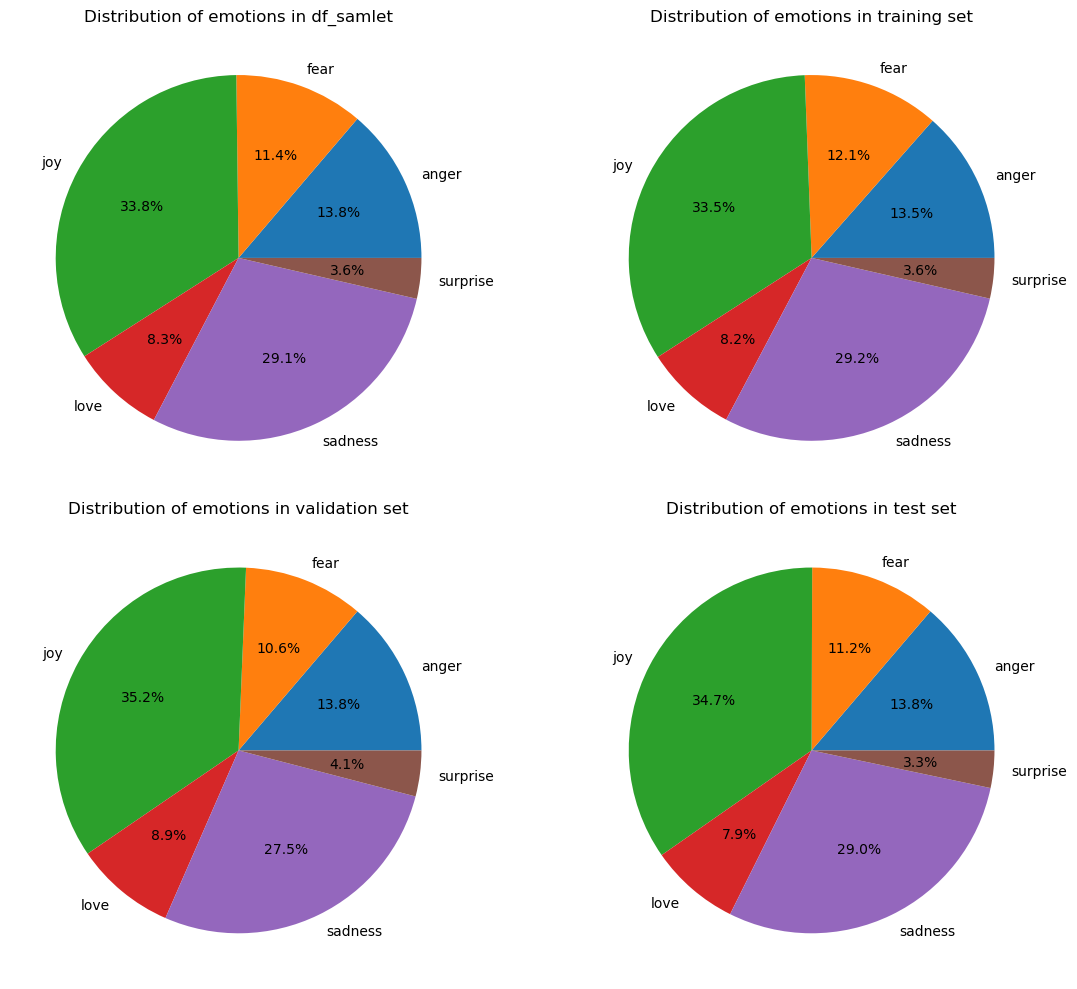

In [63]:
# Data
groups_samlet = df_samlet.groupby('label_name')['text'].count()
groups_train = df_train.groupby('label_name')['text'].count()
groups_val = df_val.groupby('label_name')['text'].count()
groups_test = df_test.groupby('label_name')['text'].count()

# Opret subplots (2 rækker og 2 kolonner)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart 1
axes[0, 0].pie(groups_samlet.values, labels=list(groups_samlet.index),autopct='%1.1f%%')
axes[0, 0].set_title('Distribution of emotions in df_samlet')

# Bar chart 2
axes[0, 1].pie(groups_train.values, labels=list(groups_train.index),autopct='%1.1f%%')
axes[0, 1].set_title('Distribution of emotions in training set')

# Bar chart 3
axes[1, 0].pie(groups_val.values, labels=list(groups_val.index),autopct='%1.1f%%')
axes[1, 0].set_title('Distribution of emotions in validation set')

# Bar chart 4
axes[1, 1].pie(groups_test.values, labels=list(groups_test.index),autopct='%1.1f%%')
axes[1, 1].set_title('Distribution of emotions in test set')

# Juster layout for at få plads til titler og labels
plt.tight_layout()

# Vis plottet
plt.show()

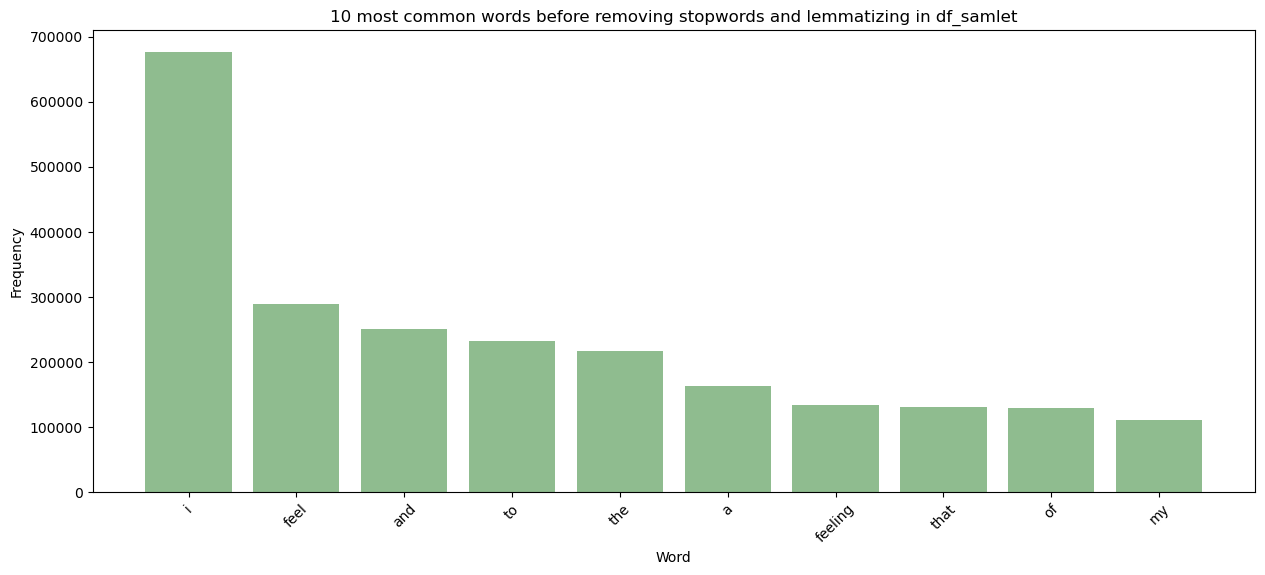

In [71]:
def word_freq(text):
    # Find words and count their frequencies
    words = re.findall(r'\b\w+\b', text)
    word_counts = Counter(words)

    return word_counts

df_samlet['word_freq'] = df_samlet['text'].apply(word_freq)

all_word_counts = Counter()
for freq in df_samlet['word_freq']:
    all_word_counts.update(freq)

most_common_words = all_word_counts.most_common(10)
words = [word for word, _ in most_common_words]
freqs = [count for _, count in most_common_words]


plt.figure(figsize=(15, 6))
plt.bar(words, freqs, color='darkseagreen')
plt.title('10 most common words before removing stopwords and lemmatizing in df_samlet')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [64]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\klykk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\klykk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\klykk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

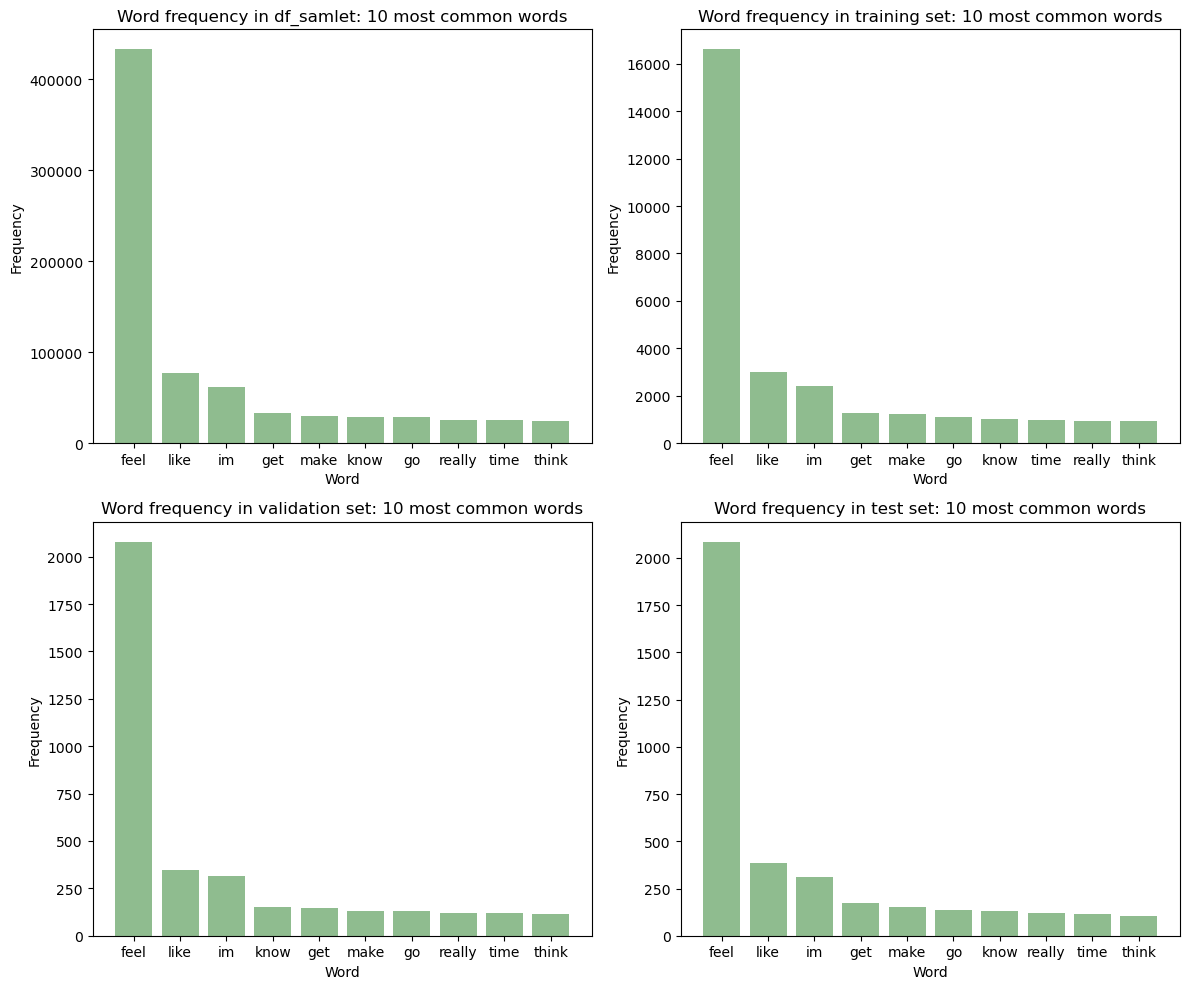

In [69]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def process_text(text):
    tokenized_text = re.findall(r'\b\w+\b', text)
    new_text = [word for word in tokenized_text if word.lower() not in stop_words]
    lemmatized_text = [lemmatizer.lemmatize(word, pos = 'v') for word in new_text]
    return ' '.join(lemmatized_text)


new_df_samlet = df_samlet.copy()
new_df_train = df_train.copy()
new_df_val = df_val.copy()
new_df_test = df_test.copy()


new_df_samlet['text'] = new_df_samlet['text'].apply(process_text)
new_df_train['text'] = new_df_train['text'].apply(process_text)
new_df_val['text'] = new_df_val['text'].apply(process_text)
new_df_test['text'] = new_df_test['text'].apply(process_text)


new_df_samlet = new_df_samlet.drop('word_freq', axis=1)

def word_freq(text):
    # Find words and count their frequencies
    words = re.findall(r'\b\w+\b', text)
    word_counts = Counter(words)

    return word_counts

new_df_samlet['word_freq'] = new_df_samlet['text'].apply(word_freq)
new_df_train['word_freq'] = new_df_train['text'].apply(word_freq)
new_df_val['word_freq'] = new_df_val['text'].apply(word_freq)
new_df_test['word_freq'] = new_df_test['text'].apply(word_freq)


all_word_counts_samlet = Counter()
all_word_counts_train = Counter()
all_word_counts_val = Counter()
all_word_counts_test = Counter()


for freq in new_df_samlet['word_freq']:
    all_word_counts_samlet.update(freq)

for freq in new_df_train['word_freq']:
    all_word_counts_train.update(freq)

for freq in new_df_val['word_freq']:
    all_word_counts_val.update(freq)

for freq in new_df_test['word_freq']:
    all_word_counts_test.update(freq)

most_common_words_samlet = all_word_counts_samlet.most_common(10)
words_samlet = [word for word, _ in most_common_words_samlet]
freqs_samlet = [count for _, count in most_common_words_samlet]


most_common_words_train = all_word_counts_train.most_common(10)
words_train = [word for word, _ in most_common_words_train]
freqs_train = [count for _, count in most_common_words_train]


most_common_words_val = all_word_counts_val.most_common(10)
words_val = [word for word, _ in most_common_words_val]
freqs_val = [count for _, count in most_common_words_val]


most_common_words_test = all_word_counts_test.most_common(10)
words_test = [word for word, _ in most_common_words_test]
freqs_test = [count for _, count in most_common_words_test]


# Opret subplots (2 rækker og 2 kolonner)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart 1
axes[0, 0].bar(words_samlet, freqs_samlet, color='darkseagreen')
axes[0, 0].set_title('Word frequency in df_samlet: 10 most common words')
axes[0, 0].set_xlabel('Word')
axes[0, 0].set_ylabel('Frequency')

# Bar chart 2
axes[0, 1].bar(words_train, freqs_train, color='darkseagreen')
axes[0, 1].set_title('Word frequency in training set: 10 most common words')
axes[0, 1].set_xlabel('Word')
axes[0, 1].set_ylabel('Frequency')

# Bar chart 3
axes[1, 0].bar(words_val, freqs_val, color='darkseagreen')
axes[1, 0].set_title('Word frequency in validation set: 10 most common words')
axes[1, 0].set_xlabel('Word')
axes[1, 0].set_ylabel('Frequency')

# Bar chart 4
axes[1, 1].bar(words_test, freqs_test, color='darkseagreen')
axes[1, 1].set_title('Word frequency in test set: 10 most common words')
axes[1, 1].set_xlabel('Word')
axes[1, 1].set_ylabel('Frequency')

# Juster layout for at få plads til titler og labels
plt.tight_layout()

# Vis plottet
plt.show()